# Scikit-learn introduction

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading data

``sklearn.datasets`` contains well known datasets that you can download and use

http://scikit-learn.org/stable/datasets/

Methods:
* load_* - load a dataset
* fetch_* - download and load a dataset
* make_* - generate a dataset

In [3]:
import sklearn
from sklearn.datasets import load_digits

### Classification data

In [4]:
digits = load_digits() # Bunch object
type(digits)

sklearn.datasets.base.Bunch

In [5]:
digits.keys()

dict_keys(['DESCR', 'target_names', 'data', 'images', 'target'])

In [10]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
digits.data.shape

(1797, 64)

In [7]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

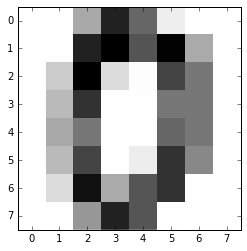

In [17]:
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation="none")

### Regression data
http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

In [18]:
housing = sklearn.datasets.fetch_california_housing()

In [19]:
housing.keys()

dict_keys(['DESCR', 'feature_names', 'data', 'target'])

In [21]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

How each feature affect housing prices?

In [23]:
x = housing.data[:, 2]
y = housing.data[:, 3]

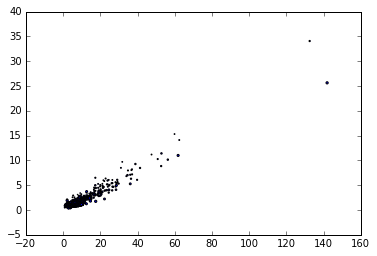

In [24]:
vals = housing.target
plt.scatter(x,y, s=vals)

## Classify digits

Split the dataset into a train and test set

In [27]:
from sklearn.cross_validation import train_test_split
Xtrain_d, Xtest_d, ytrain_d, ytest_d = train_test_split(digits.data, digits.target, test_size=0.1)

In [28]:
len(Xtrain_d), len(Xtest_d)

(1617, 180)

Let's use kNN classifiers!

In [25]:
from sklearn.neighbors import KNeighborsClassifier as kNN

In [30]:
n1_model = kNN(n_neighbors=3, n_jobs=5)

In [31]:
n1_model.fit(Xtrain_d, ytrain_d)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=5, n_neighbors=3, p=2,
           weights='uniform')

In [32]:
# Let's compare the predicated values with the actal ones
X0 = [digits.data[0]]
y0 = digits.target[0]
out0 = n1_model.predict(X0)[0]
print("Equals: ", out0, y0)

Equals:  0 0


In [33]:
n1_model.predict_proba(X0) # The model is pretty sure about its prediction

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### Evaluate the model

In [34]:
n1_model.score(Xtest_d, ytest_d) # Check the accuracy on the training data

0.98333333333333328

In [35]:
from sklearn.metrics import confusion_matrix, f1_score
ypred_d = n1_model.predict(Xtest_d)
confusion_matrix(ypred_d, ytest_d)

array([[14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 17]])

In [36]:
f1_score(ytest_d, ypred_d, average="macro")

0.98396126294027597

#### ...with cross validation

In [25]:
from sklearn.cross_validation import cross_val_score
res = cross_val_score(n1_model, digits.data, digits.target, cv=10)
print(res)
print("Average:", np.average(res))

[ 0.94054054  1.          0.98895028  0.98888889  0.96089385  0.98324022
  0.98324022  0.98314607  0.97740113  0.97159091]
Average: 0.97778921138


## Estimating housing prices

In [37]:
from sklearn.linear_model import LinearRegression 

In [38]:
lin_model = LinearRegression()

In [39]:
housing.data.shape

(20640, 8)

In [40]:
sep = 15000
X_h = housing.data[:sep,2:4]
y_h = housing.target[:sep]
lin_model.fit(X_h, y_h)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lin_model.predict([housing.data[sep][2:4]]), housing.target[sep]

(array([ 2.02234329]), 1.407)

In [42]:
lin_model.score(housing.data[sep:, 2:4], housing.target[sep:])

0.073359798102767604

## Exercise

Find the best model for the diabetes dataset: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes